In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
train_data

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


как видим, в датасете есть пустые строки - удалим их все из набора данных, потому что они не несут важной информации

In [3]:
train_data.dropna(how='all', inplace=True)
train_data[train_data.isna().all(axis=1)]

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore


в прошлом контесте были найдены выбросы в столбце, поэтому проведем ту же процедуру по их нахождению и удалению 

<Axes: ylabel='RiskScore'>

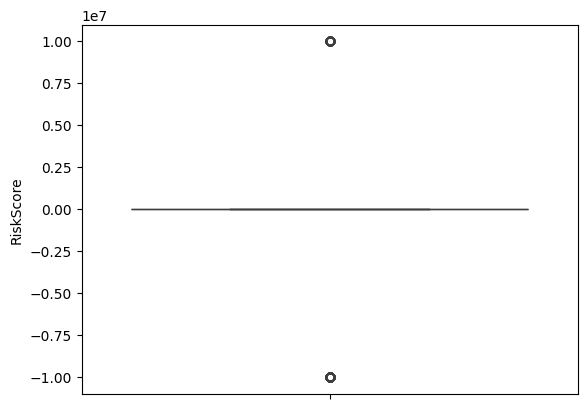

In [4]:
sns.boxplot(train_data['RiskScore'])

Выбросы те же самые, но для большей налядности удалим выбросы с помощью метода IQR, который возвращает значения, лежащие за нормальными пределами квартилей

In [5]:
Q1 = np.percentile(train_data['RiskScore'], 25)
Q3 = np.percentile(train_data['RiskScore'], 75)

IQR = Q3 - Q1

Q1, Q3, IQR

(32.5647484719357, 65.35689774336566, 32.79214927142996)

Посмотрим допустимые значения для RiskScore

In [6]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(-16.623475435209244, 114.54512165051061)

In [7]:
outliers = train_data[(train_data['RiskScore'] < lower_bound )| (train_data['RiskScore'] > upper_bound)]['RiskScore']

print("Количесво выбросов: ", len(outliers))

print("Значения выбросов: ", outliers.unique())

Количесво выбросов:  215
Значения выбросов:  [-9999999. 10000000.]


Зная аномальные значеня, можно удалить из выборки строки их содержащие

<Axes: ylabel='RiskScore'>

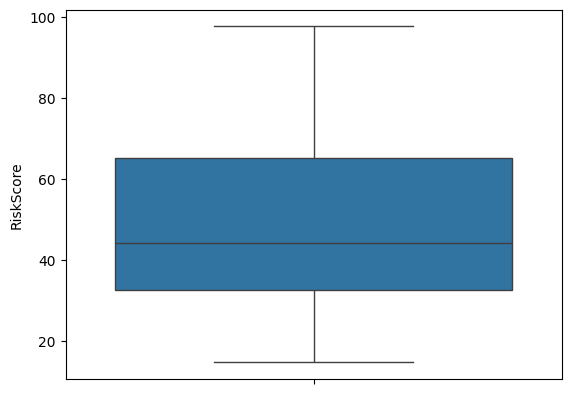

In [8]:
train_data = train_data[(train_data['RiskScore'] != -9999999.) & (train_data['RiskScore'] != 10000000.)] 
sns.boxplot(train_data['RiskScore'])

Отберем категориальные и числовые признаки для отдельной предобработки

In [9]:
num_cols = train_data.select_dtypes(exclude='object').columns.to_list()
categorical_cols = train_data.select_dtypes(include='object').columns.to_list()
num_cols.remove('LoanApproved') # удалим целевую переменную из списка параметров для предобработки
categorical_cols.remove('ApplicationDate')
num_cols, categorical_cols

(['Age',
  'AnnualIncome',
  'CreditScore',
  'LoanAmount',
  'LoanDuration',
  'NumberOfDependents',
  'MonthlyDebtPayments',
  'CreditCardUtilizationRate',
  'NumberOfOpenCreditLines',
  'NumberOfCreditInquiries',
  'DebtToIncomeRatio',
  'BankruptcyHistory',
  'PreviousLoanDefaults',
  'PaymentHistory',
  'LengthOfCreditHistory',
  'SavingsAccountBalance',
  'CheckingAccountBalance',
  'TotalAssets',
  'TotalLiabilities',
  'MonthlyIncome',
  'UtilityBillsPaymentHistory',
  'JobTenure',
  'Experience',
  'NetWorth',
  'BaseInterestRate',
  'InterestRate',
  'MonthlyLoanPayment',
  'TotalDebtToIncomeRatio',
  'RiskScore'],
 ['MaritalStatus',
  'HomeOwnershipStatus',
  'LoanPurpose',
  'EmploymentStatus',
  'EducationLevel'])

# Обработка признаков
## Заполнение пропусков для num_cols
Для заполнения пустых значений вещественных признаков воспользуемся алгоритмом KNNImputer, который усредняет пропущенное значение средним значением n_neighbours 

In [10]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer()

train_data[num_cols] = knn_imputer.fit_transform(train_data[num_cols])

train_data[num_cols].isna().sum()

Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
NumberOfDependents            0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
Experience                    0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyLoanPayment            0
TotalDebtToIncomeRatio        0
RiskScore                     0
dtype: int64

## Заполнение пропусков для categorical_cols
Категориальные признаки можно заполнить модой - самое частовстречаемое значение в признаке

In [11]:
for feature in categorical_cols:
    most_frequent_value = train_data[feature].mode()[0]
    train_data[feature].fillna(most_frequent_value, inplace=True)
train_data[categorical_cols].isna().sum()

MaritalStatus          0
HomeOwnershipStatus    0
LoanPurpose            0
EmploymentStatus       0
EducationLevel         0
dtype: int64

## Кодиррование категориальных призаков и нормализация вещественных признаков
Эти процедуры понадобятся для обучения модели логистической регресии

In [12]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(train_data[categorical_cols])
encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_cols))
encoded_df

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10268,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10269,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10270,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_data = train_data[num_cols]
num_data = scaler.fit_transform(train_data[num_cols])
normalized = pd.DataFrame(num_data, columns=num_cols)
normalized

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,-1.108451,-0.558650,-0.741546,-0.456579,0.268131,-0.400573,1.113292,-0.831696,-0.591929,0.022255,...,-0.560983,1.005394,-0.432306,-1.203829,-0.261972,0.613635,0.530862,-0.421499,-0.256612,1.033513
1,1.304533,0.350659,0.986774,-0.499734,-0.710632,-0.400573,-0.679621,-0.682975,-0.016743,-0.989281,...,0.373890,0.103462,-1.340227,1.355815,-0.279778,-1.217712,-1.108086,-0.417278,-0.520888,-1.152068
2,0.959821,1.454535,0.986774,0.316767,-0.710632,-1.105987,-0.000180,1.003963,-0.016743,-0.989281,...,1.508799,1.067638,-0.886267,0.914497,0.275158,-0.979556,-0.877497,0.140186,-0.496417,-0.804495
3,-1.280807,-0.836197,0.969549,-0.387239,-0.221251,-1.105987,-0.797256,-0.602935,2.284003,-0.989281,...,-0.846332,0.746299,-0.886267,-1.556883,-0.319022,-1.062226,-0.904643,-0.429240,-0.326289,-0.663975
4,1.304533,1.454535,0.986774,0.024230,-0.221251,0.304842,0.032271,-0.069843,-0.016743,0.022255,...,1.508799,0.846062,0.021655,1.179288,-0.329446,-0.958211,-1.150906,-0.238737,-0.518511,-0.986682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,-0.074315,1.454535,0.986774,-0.806534,0.757512,2.421084,-0.547789,-0.435536,-0.591929,0.022255,...,1.508799,0.759157,-1.340227,-0.144666,-0.298309,-0.987183,-0.948396,-0.689699,-0.558387,-1.177820
10268,1.476889,1.454535,0.986774,-0.549252,-0.221251,0.304842,0.149906,1.211837,-1.167115,2.045329,...,1.508799,0.013270,-0.432306,1.797133,0.030477,-1.125483,-0.971269,-0.517796,-0.532725,-0.923256
10269,-1.022273,-1.006139,-2.171286,0.789457,1.736274,-0.400573,0.304047,0.238311,-0.591929,-0.989281,...,-1.021052,-0.377507,-0.886267,-1.115565,-0.081368,2.625161,2.080039,0.528373,1.639212,1.120324
10270,-1.453163,-1.006139,-2.159802,0.034726,0.757512,1.010256,-0.269928,1.333035,-0.591929,-0.989281,...,-1.021052,-0.184199,-0.886267,-1.556883,0.214220,2.181010,1.661568,-0.023003,0.723484,1.562277


In [14]:
logreg_data = pd.concat([normalized, encoded_df], axis = 1)
logreg_data

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,-1.108451,-0.558650,-0.741546,-0.456579,0.268131,-0.400573,1.113292,-0.831696,-0.591929,0.022255,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.304533,0.350659,0.986774,-0.499734,-0.710632,-0.400573,-0.679621,-0.682975,-0.016743,-0.989281,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.959821,1.454535,0.986774,0.316767,-0.710632,-1.105987,-0.000180,1.003963,-0.016743,-0.989281,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.280807,-0.836197,0.969549,-0.387239,-0.221251,-1.105987,-0.797256,-0.602935,2.284003,-0.989281,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.304533,1.454535,0.986774,0.024230,-0.221251,0.304842,0.032271,-0.069843,-0.016743,0.022255,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,-0.074315,1.454535,0.986774,-0.806534,0.757512,2.421084,-0.547789,-0.435536,-0.591929,0.022255,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10268,1.476889,1.454535,0.986774,-0.549252,-0.221251,0.304842,0.149906,1.211837,-1.167115,2.045329,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10269,-1.022273,-1.006139,-2.171286,0.789457,1.736274,-0.400573,0.304047,0.238311,-0.591929,-0.989281,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10270,-1.453163,-1.006139,-2.159802,0.034726,0.757512,1.010256,-0.269928,1.333035,-0.591929,-0.989281,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### Обучение логистической регрессии

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

### Разделение выборки на тестовую и валидационную

In [16]:
from sklearn.model_selection import train_test_split
y = train_data['LoanApproved']
log_X_train, log_X_test, y_train, y_test = train_test_split(logreg_data, y, test_size=0.2)

In [17]:
params = {
    'C' : [0.1, 1, 10],
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'solver' : ['lbfgs', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), params, cv=10, scoring='roc_auc')
grid_search.fit(log_X_train, y_train)
log_reg_predicted = grid_search.predict(log_X_test)

In [18]:
lg_pred_test = (log_reg_predicted, y_test)

### Обучение случайного леса

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
X_train, X_test, y_train, y_test = train_test_split(logreg_data, y, test_size=0.2)

In [21]:
rf_params = {
    'max_depth' : [2, 3, 5, 10],
    'max_leaf_nodes' : [3, 5, 10]
}

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_params, scoring='roc_auc')
rf_grid_search.fit(X_train, y_train)
rf_predicted = rf_grid_search.predict(X_test)

In [22]:
rf_pred_test = (rf_predicted, y_test)

### Обучение градиентного бустинга

In [23]:
from catboost import CatBoostClassifier

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train_data[num_cols + categorical_cols], y, test_size=0.2)

cb_model = CatBoostClassifier(cat_features=categorical_cols)
cb_model.fit(X_test, y_test)
cb_predicted = cb_model.predict(X_test)


Learning rate set to 0.014012
0:	learn: 0.6676511	total: 61.4ms	remaining: 1m 1s
1:	learn: 0.6458490	total: 63.4ms	remaining: 31.7s
2:	learn: 0.6225394	total: 66.3ms	remaining: 22s
3:	learn: 0.5990185	total: 69.2ms	remaining: 17.2s
4:	learn: 0.5807498	total: 71.3ms	remaining: 14.2s
5:	learn: 0.5648380	total: 73ms	remaining: 12.1s
6:	learn: 0.5468604	total: 75.2ms	remaining: 10.7s
7:	learn: 0.5299426	total: 77.6ms	remaining: 9.62s
8:	learn: 0.5097360	total: 79.7ms	remaining: 8.77s
9:	learn: 0.4926204	total: 81.4ms	remaining: 8.05s
10:	learn: 0.4788111	total: 83.3ms	remaining: 7.49s
11:	learn: 0.4626933	total: 85.9ms	remaining: 7.07s
12:	learn: 0.4510202	total: 88.1ms	remaining: 6.69s
13:	learn: 0.4312084	total: 90.3ms	remaining: 6.36s
14:	learn: 0.4191093	total: 92.2ms	remaining: 6.06s
15:	learn: 0.4057452	total: 95.2ms	remaining: 5.85s
16:	learn: 0.3946280	total: 97.2ms	remaining: 5.62s
17:	learn: 0.3818287	total: 99.3ms	remaining: 5.42s
18:	learn: 0.3711189	total: 101ms	remaining: 5.2

In [25]:
cb_pred_test = (cb_predicted, y_test)

In [26]:
import xgboost as xgb

In [27]:
cats_data = train_data
for feature in categorical_cols:
    cats_data.loc[:, feature] = cats_data.loc[:, feature].astype('category')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(logreg_data, y, test_size=0.2)

In [29]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_test, y_test)
xgb_predicted = xgb_model.predict(X_test)

In [30]:
xgb_pred_test = (xgb_predicted, y_test)

### LightGBM

In [31]:
import lightgbm as lgb

In [32]:
X_train, X_test, y_train, y_test = train_test_split(logreg_data, y, test_size=0.2)

In [33]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)
lgb_model.fit(X_train, y_train)

lgb_predict = lgb_model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4198, number of negative: 4019
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4864
[LightGBM] [Info] Number of data points in the train set: 8217, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510892 -> initscore=0.043575
[LightGBM] [Info] Start training from score 0.043575


In [34]:
lgb_pred_test = (y_test, lgb_predict)

### SVM (Support Vector Machine)

In [35]:
from sklearn.svm import SVC

In [36]:
X_train, X_test, y_train, y_test = train_test_split(logreg_data, y, test_size=0.2)
svc = SVC()
svc.fit(X_train, y_train)
svc_result = svc.predict(X_test)

In [37]:
svc_pred_test = (svc_result, y_test)

### Реализация собственной логистичской регресии
Основные модели для задачи классификации обучены, теперь можно написать собственный класс логистической регрессии и сравнить результат работы с библиотеками из sklearn

In [ ]:
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

class MyLogisticRegression(object):
    def __init__(self, max_iterations = 1000, lr = 0.01, threshold = 0.5, l1 = 0.1):
        self.__weights = None
        self.__bias = 0
        self.__max_iter = max_iterations
        self.__lr = lr
        self.__threshold = threshold
        self.__l1 = l1
    
    def fit(self, X, y):
        n_samples, m_features = X.shape
        
        self.__weights = np.zeros(m_features)
        self.__bias = 0

        X = np.array(X)
        y = np.array(y)

        for _ in range(self.__max_iter):
            z = logit(X, self.__weights) + self.__bias

            prediction = sigmoid(z)

            grad_w = (1. / n_samples) * np.dot(X.T,(prediction - y).reshape(-1, 1)).flatten()
            grad_bias = (1. / n_samples) * np.sum((prediction - y))

            self.__weights -= grad_w * self.__lr
            self.__bias -= grad_bias * self.__lr
        return self

            
    def predict(self, X):
        z = logit(X, self.__weights) + self.__bias

        predicted = sigmoid(z)

        return np.where(predicted >= self.__threshold, 1, 0)
    

In [39]:
X_train, X_test, y_train, y_test = train_test_split(logreg_data, y, test_size=0.2)

In [45]:
clf = MyLogisticRegression()

clf.fit(X_train, y_train)

my_reg_predict = clf.predict(X_test)

In [46]:
mylogreg_pred_test = (my_reg_predict, y_test)

{0, 1}

# Сравнение метрик алгоритмов
### ROC-AUC score, F1-score, accuracy, precision, recall

In [47]:
pred_test_array = [lg_pred_test, svc_pred_test, mylogreg_pred_test, rf_pred_test, cb_pred_test, lgb_pred_test, xgb_pred_test]
models_list = [
    'Sklearn logistic regression',
    'SVC',
    'My logistic regression',
    'Random Forest',
    'CatBoost',
    'LightGBM',
    'XGBoost'
]

score_list = [
    'F1-score',
    'Accuracy',
    'Precision',
    'Recall'
]



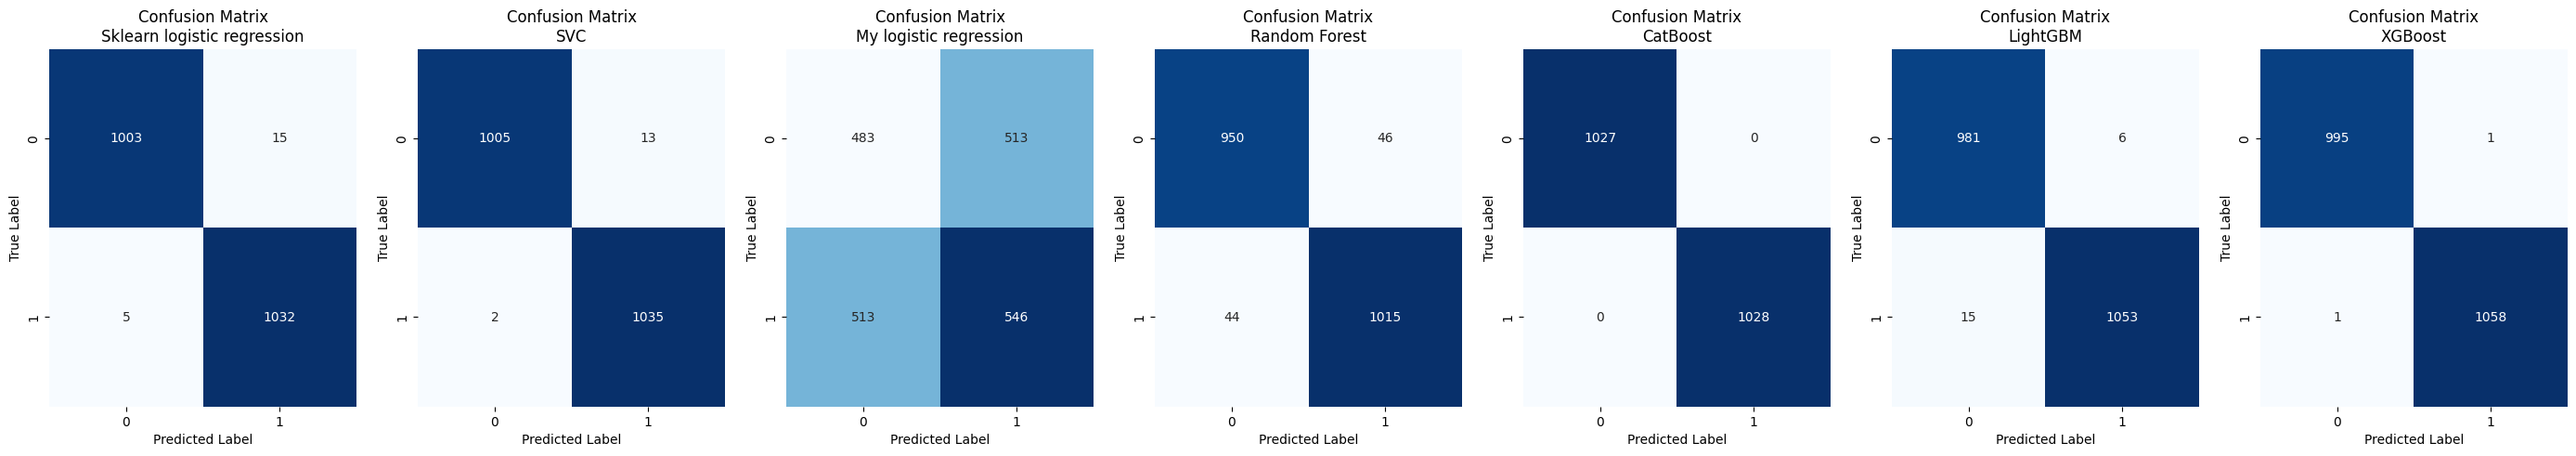

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [48]:
from sklearn.metrics import confusion_matrix

n_models = len(models_list)
fig, axes = plt.subplots(1, n_models, figsize=(5 * n_models, 5)) 

for i, (model_name, (y_pred, y_test)) in enumerate(zip(models_list, pred_test_array)):
    plt.figure()
    cm = confusion_matrix(y_test, y_pred)
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'Confusion Matrix\n{model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
plt.tight_layout()
plt.show()

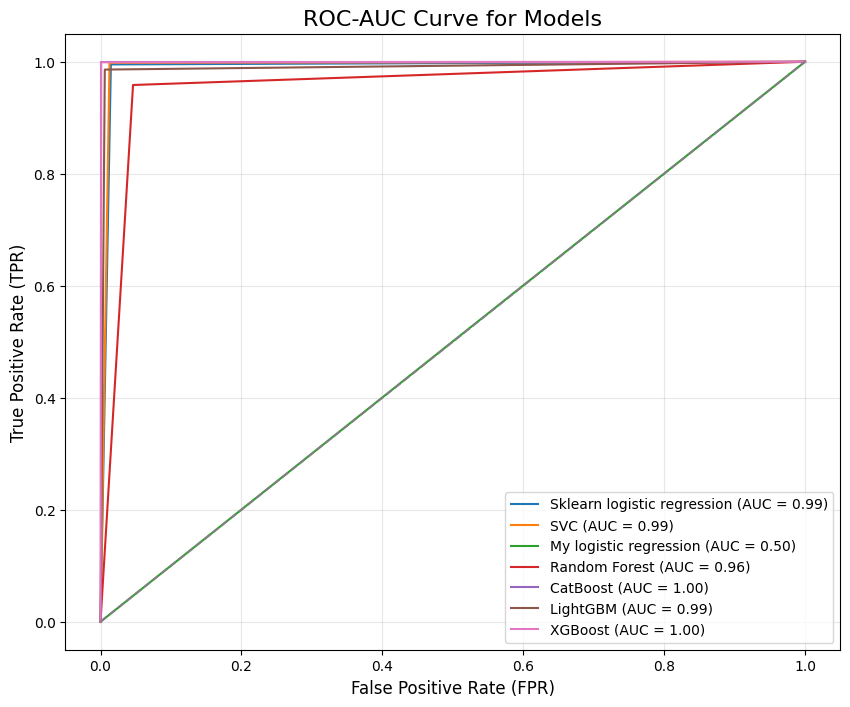

In [49]:

from sklearn.metrics import auc, roc_curve


plt.figure(figsize=(10, 8))  # Устанавливаем размер графика
    
for model_name, (y_pred, y_test) in zip(models_list, pred_test_array):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)  
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC-AUC Curve for Models", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.show()